In [ ]:
from dglchem.utils import featurizer as fe
from dglchem.utils import featurizer_old as fo
from rdkit import Chem

mol = Chem.MolFromSmiles('COO')
feat = fe.AtomFeaturizer()
feat_old = fo.AtomFeaturizerOld()

bond = fe.BondFeaturizer()
bond_old = fo.BondFeaturizer()

assert feat(mol) is not None 
assert bond(mol) is not None
assert (feat(mol)[0] == feat_old(mol)['h'][0]).all()
assert (bond(mol)[0] == bond_old(mol)['e'][0]).all()
print('Featurizers are fine!')

#%timeit feat(mol)
#%timeit feat_old(mol)
#%timeit bond(mol)
#%timeit bond_old(mol)

In [ ]:
from dglchem.datasets import BradleyDoublePlus
data = BradleyDoublePlus()

assert data.get_splits('consecutive') is not None
print('consecutive is a success')
assert data.get_splits('random') is not None
print('random is a success')
assert data.get_splits('molecular_weight') is not None
print('molecular_weight is a success')
#assert data.get_splits('stratified') is not None
#print('stratified is a success')

In [ ]:
from dglchem.datasets import BradleyDoublePlus
from dglchem.utils.data_splitting import taylor_butina_clustering
data = BradleyDoublePlus()

clusters = taylor_butina_clustering(data)

In [ ]:
from dglchem.datasets import BradleyDoublePlus
data = BradleyDoublePlus()

data.weight_vs_target_plot()

In [ ]:
import torch
import torch.nn.functional as F
from dglchem.datasets import BradleyDoublePlus
from dglchem.utils import DataSet
from dglchem.models import MGConv
from torch_geometric.loader import DataLoader

dataset = DataSet(file_path='./data/processed/BradleyDoublePlus.pickle')
#dataset.draw_smile(0).show()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

data = dataset[0].to(device)

model = MGConv(num_layers=2, node_dim=data.num_node_features, edge_dim=data.num_edge_features).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.mse_loss(out, data.y)
    print(loss.detach().numpy())
    loss.backward()
    optimizer.step()

In [ ]:
from dglchem.utils import DataSet

In [ ]:
from torch import Tensor, cat
y = Tensor([1,0,1,1])
x = Tensor([0,1,2,3])

print(cat((x,y)))

In [ ]:
%matplotlib inline
from dglchem.datasets import BradleyDoublePlus
dataset = BradleyDoublePlus()

from dglchem.utils import classify_compounds
_, num_dict = classify_compounds(dataset.smiles)
l = 0
for key in num_dict.keys():
    l+=num_dict[key]
print(f'Dataset length: {len(dataset.smiles)}', f'Dictionary length: {l}', sep='\n')
    

from dglchem.utils import compound_nums_chart
compound_nums_chart(dataset.smiles, save_fig=True)


In [ ]:
from rdkit.Chem import MolFromSmiles

def add_atom_mass_above_30(atom):
            if atom.GetMass() > 15:
                return [True]
            else:
                return [False]


from dglchem.utils import AtomFeaturizer
featurizer = AtomFeaturizer(atom_feature_list = ['atom_type_one_hot'])
featurizer_raw = AtomFeaturizer(atom_feature_list = ['atom_type_one_hot'])
featurizer.extend_features(['garbo'],[add_atom_mass_above_30])

print(featurizer(MolFromSmiles('COO')))
print(featurizer_raw(MolFromSmiles('COO')))
print(featurizer.atom_feature_list)

In [ ]:
from dglchem.datasets import BradleyDoublePlus, LogP
from dglchem.utils import compounds_dataset_heatmap

smiles1 = BradleyDoublePlus().smiles
smiles2 = LogP().smiles
compounds_dataset_heatmap([smiles1,smiles2],['BDP','LogP'],save_fig=True)

In [ ]:
import numpy as np
from dglchem.utils import loss_plot
from dglchem.utils import GraphDataSet
from dglchem.utils import train_model
from dglchem.models import MGConv
import torch.nn.functional as F
import torch

device = torch.device('cpu')
graph_data = GraphDataSet(file_path='./data/processed/BradleyDoublePlus.pickle',split=True)
model = MGConv(num_layers=2, node_dim=graph_data.num_node_features, edge_dim=graph_data.num_edge_features).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
loss = F.mse_loss

trl, tl = train_model(model, loss_func=loss, optimizer=optimizer, train_data_loader=graph_data.train,
                      test_data_loader=graph_data.test, early_stopping=False)



loss_plot([trl,tl],['train loss','test loss'])

In [ ]:
import numpy as np
from dglchem.utils import loss_plot
from dglchem.utils import GraphDataSet
from dglchem.utils import train_model
from dglchem.models import MPNNModel
import torch.nn.functional as F
import torch

device = torch.device('cpu')
graph_data = GraphDataSet(file_path='./data/processed/BradleyDoublePlus.pickle',split=True)
x = graph_data.train[0]
model = MPNNModel(node_dim=graph_data.num_node_features, edge_dim=graph_data.num_edge_features,
             num_layers=5, node_hidden_dim=64).to(device)
model(x)

In [ ]:
from dglchem.datasets import BradleyDoublePlus
data = BradleyDoublePlus()
data.draw_smile(2)

In [ ]:
from dglchem.datasets import BradleyDoublePlus
data = BradleyDoublePlus()
data.save_dataset()

In [ ]:
from dglchem.datasets import LogP
data = LogP()
data.save_dataset()

In [ ]:
from dglchem.utils import DataSet
from dglchem.datasets import BradleyDoublePlus
#data = DataSet(file_path='./data/processed/BradleyDoublePlus.pickle')
%timeit data = DataSet(file_path='./data/processed/BradleyDoublePlus.pickle')
%timeit data = BradleyDoublePlus()

In [ ]:
from dglchem.datasets import LogP
from dglchem.utils import DataSet
%timeit data = DataSet(file_path='./data/processed/LogP.pickle')
%timeit data = LogP()

In [9]:
from dglchem.datasets import BradleyDoublePlus
import pandas as pd
from rdkit.Chem import SmilesWriter, MolFromSmiles, MolToSmiles

data = BradleyDoublePlus()
data.get_mol()[:5]
print(data.smiles[10:15])

['CC(Cl)Cl', 'CC(CO)(CO)[N+](=O)[O-]', 'Clc1cccs1', 'CCCOC(=O)CC', 'C=C(C)OC(C)=O']


In [14]:
from dglchem.datasets import BradleyDoublePlus
from torch_geometric.loader import DataLoader
data = BradleyDoublePlus()

train, _, _ = data.get_splits()
train_loader = DataLoader(train, batch_size=32)
for batch in train_loader:
    print(batch.edge_attr.shape)

torch.Size([762, 12])
torch.Size([976, 12])
torch.Size([762, 12])
torch.Size([722, 12])
torch.Size([876, 12])
torch.Size([886, 12])
torch.Size([750, 12])
torch.Size([780, 12])
torch.Size([772, 12])
torch.Size([776, 12])
torch.Size([706, 12])
torch.Size([932, 12])
torch.Size([758, 12])
torch.Size([794, 12])
torch.Size([640, 12])
torch.Size([768, 12])
torch.Size([824, 12])
torch.Size([886, 12])
torch.Size([730, 12])
torch.Size([832, 12])
torch.Size([674, 12])
torch.Size([826, 12])
torch.Size([828, 12])
torch.Size([804, 12])
torch.Size([640, 12])
torch.Size([656, 12])
torch.Size([708, 12])
torch.Size([750, 12])
torch.Size([846, 12])
torch.Size([756, 12])
torch.Size([730, 12])
torch.Size([718, 12])
torch.Size([868, 12])
torch.Size([730, 12])
torch.Size([790, 12])
torch.Size([694, 12])
torch.Size([772, 12])
torch.Size([714, 12])
torch.Size([762, 12])
torch.Size([714, 12])
torch.Size([596, 12])
torch.Size([770, 12])
torch.Size([840, 12])
torch.Size([842, 12])
torch.Size([684, 12])
torch.Size

In [1]:
import json
import os
classes  = dict()
path = 'classyfire'
for file in os.listdir(path):
    file_path = os.path.join(path,file)
    try:
        class_name = json.load(open(file_path))['class']['name']
        if class_name in classes.keys():
            classes[class_name] += 1
        else:
            classes[class_name] = 1
    except:
        print('no class name in the first layer')


no class name in the first layer
no class name in the first layer
no class name in the first layer
no class name in the first layer
{'Alkyl halides': 6, 'Fatty Acyls': 13, 'Organobromides': 12, 'Organic carbonic acids and derivatives': 1, 'Naphthalenes': 2, 'Halohydrins': 4, 'Vinyl halides': 5, 'Benzene and substituted derivatives': 15, 'Carboxylic acids and derivatives': 16, 'Organooxygen compounds': 8, 'Homogeneous halogens': 1, 'Cinnamic acids and derivatives': 2, 'Acyl halides': 2, 'Organonitrogen compounds': 2, 'Triphenyl compounds': 1, 'Keto acids and derivatives': 1, 'Phenols': 2, 'Allyl-type 1,3-dipolar organic compounds': 1, 'Organochlorides': 2}


no class name in the first layer
no class name in the first layer
no class name in the first layer
no class name in the first layer


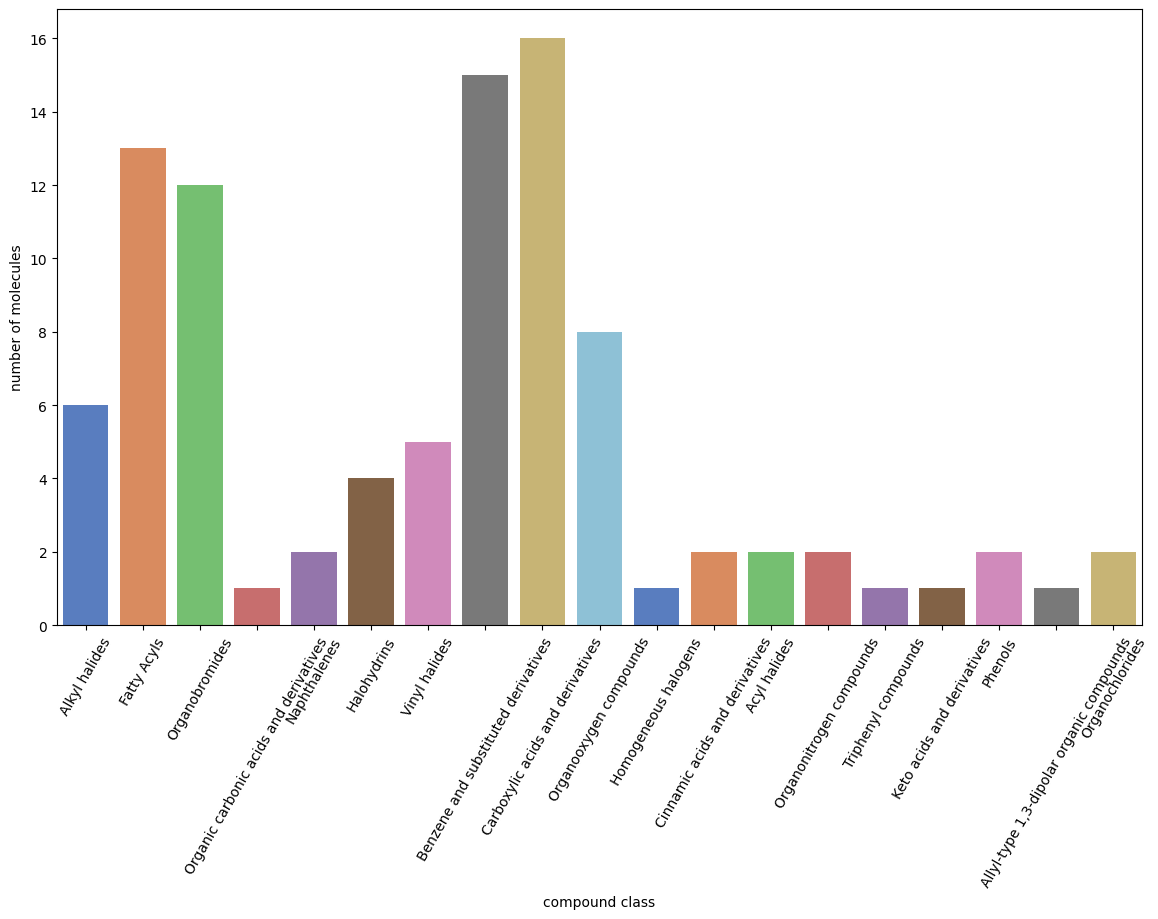

In [1]:
from dglchem.utils import num_chart
import json
import os
classes  = dict()
path = 'classyfire'
for file in os.listdir(path):
    file_path = os.path.join(path,file)
    try:
        class_name = json.load(open(file_path))['class']['name']
        if class_name in classes.keys():
            classes[class_name] += 1
        else:
            classes[class_name] = 1
    except:
        print('no class name in the first layer')
num_chart(num_dict = classes)